# Задача
В этой работе вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week
 
Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

В этой задаче для обучения будут использовать 2 алгоритма:
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

# Решение

1) ИМПОРТИРУЕМ НУЖНЫЕ БИБЛИОТЕКИ

In [1]:
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = 10, 6

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

2) ЗАГРУЖАЕМ ДАННЫЕ ИЗ CSV-ФАЙЛА

In [4]:
# your code here
adult_df = pd.read_csv('data.adult.csv')

In [5]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


## Анализ и предобработка данных


In [6]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16280 non-null  int64 
 1   workclass       16280 non-null  object
 2   fnlwgt          16280 non-null  int64 
 3   education       16280 non-null  object
 4   education-num   16280 non-null  int64 
 5   marital-status  16280 non-null  object
 6   occupation      16280 non-null  object
 7   relationship    16280 non-null  object
 8   race            16280 non-null  object
 9   sex             16280 non-null  object
 10  capital-gain    16280 non-null  int64 
 11  capital-loss    16280 non-null  int64 
 12  hours-per-week  16280 non-null  int64 
 13  >50K,<=50K      16280 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.7+ MB


3) ПРЕДОБРАБОТКА ДАННЫХ, УДАЛЕНИЕ ЗНАКОВ "?", УДАЛЕНИЕ ОТСУТСТВУЮЩИХ ЗНАЧЕНИЙ ИЗ ДАТАСЕТА

In [7]:
adult_df.replace("?", np.nan, inplace=True)

In [8]:
adult_df.dropna(inplace=True, ignore_index=True)

In [9]:
# your code here

adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15347 entries, 0 to 15346
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15347 non-null  int64 
 1   workclass       15347 non-null  object
 2   fnlwgt          15347 non-null  int64 
 3   education       15347 non-null  object
 4   education-num   15347 non-null  int64 
 5   marital-status  15347 non-null  object
 6   occupation      15347 non-null  object
 7   relationship    15347 non-null  object
 8   race            15347 non-null  object
 9   sex             15347 non-null  object
 10  capital-gain    15347 non-null  int64 
 11  capital-loss    15347 non-null  int64 
 12  hours-per-week  15347 non-null  int64 
 13  >50K,<=50K      15347 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.6+ MB


4) ЗАМЕНА ЗНАЧЕНИЙ ТАРГЕТА '<=50K', '>50K' НА 0, 1 СООТВЕТСТВЕННО

In [10]:
adult_df['>50K,<=50K'].replace(['<=50K', '>50K'], [0, 1], inplace=True)

C:\Users\egoma\AppData\Local\Temp\ipykernel_8032\3510728780.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_df['>50K,<=50K'].replace(['<=50K', '>50K'], [0, 1], inplace=True)
C:\Users\egoma\AppData\Local\Temp\ipykernel_8032\3510728780.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adul

In [11]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,0
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,0
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,0
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,0
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,1


5) ПЕРЕВОД НЕПРЕРЫВНОЙ ПЕРЕМЕННОЙ 'AGE' (ВОЗРАСТ) В КАТЕГОРИАЛЬНУЮ

In [21]:
def replace_age_with_age_group(df:pd.DataFrame):
    if df['age'] < 18:
        return 'teenagers'
    elif df['age'] >= 18 and df['age'] < 30:
        return 'young adults'
    elif df['age'] >= 30 and df['age'] < 45:
        return 'middle-aged adults'
    elif df['age'] >= 45:
        return 'old-aged adults'

In [19]:
def hours_per_week_categorical(df:pd.DataFrame):
    if df['hours-per-week'] < 30:
        return 'light schedule'
    elif df['hours-per-week'] >= 30 and df['hours-per-week'] < 50:
        return 'medium schedule'
    elif df['hours-per-week'] >= 50 and df['hours-per-week'] < 80:
        return 'heavy schedule'
    elif df['hours-per-week'] >= 80:
        return 'very heavy schedule'

In [ ]:
adult_df['age_groups'] = adult_df.apply(replace_age_with_age_group, axis=1)
adult_df['working_schedule_groups'] = adult_df.apply(hours_per_week_categorical, axis=1)

НОРМАЛИЗАЦИЯ ПРИЗНАКОВ capital-gain, capital-loss

In [ ]:
adult_df['capital-gain-normalized'] = (adult_df['capital-gain'] - adult_df['capital-gain'].mean())/adult_df['capital-gain'].std()
adult_df['capital-loss-normalized'] = (adult_df['capital-loss'] - adult_df['capital-loss'].mean())/adult_df['capital-loss'].std()

УДАЛЕНИЕ ИСХОДНЫХ НЕПРЕРЫВНЫХ ДАННЫХ

In [ ]:
adult_df.drop(['age', 'hours-per-week', 'capital-gain', 'capital-loss'], inplace=True, axis=1)

6) ONE-HOT КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ С ИСПОЛЬЗОВАНИЕМ PANDAS-МЕТОДА GET_DUMMIES():

In [ ]:
cols = [x for x in adult_df.columns if x != '>50K,<=50K']
cols_for_dummies = ['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'age_groups', 'working_schedule_groups']

In [16]:
data = adult_df[cols]
target = adult_df['>50K,<=50K']

In [17]:
data = pd.get_dummies(data, columns=cols_for_dummies, dtype=int)

In [18]:
data.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,age_groups_middle-aged adults,age_groups_old-aged adults,age_groups_teenagers,age_groups_young adults
0,34,284843,594,0,60,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,40,190290,0,0,40,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
2,36,177858,0,0,40,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0
3,22,184756,0,0,30,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
4,47,149700,15024,0,40,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0


7) РАЗДЕЛЕНИЕ ДАТАСЕТА (ДАННЫЕ, ТАРГЕТ) НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ, ПРОВЕРКА ДАННЫХ НА СБАЛАНСИРОВАННОСТЬ

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.6, random_state=1)

In [20]:
# your code here

print('<= 50K:', target.loc[target == 0].count())
print('> 50K:', target.loc[target == 1].count())
print('Rich-poor ratio:', round(target.loc[target == 0].count() / target.loc[target == 1].count(), 2))

<= 50K: 11407
> 50K: 3940
Rich-poor ratio: 2.9


In [21]:
for col in data.columns:
    print(col, ':', data[col].sum())

age : 590791
fnlwgt : 2902954632
capital-gain : 16164905
capital-loss : 1360780
hours-per-week : 627576
workclass_Federal-gov : 461
workclass_Local-gov : 1067
workclass_Private : 11282
workclass_Self-emp-inc : 561
workclass_Self-emp-not-inc : 1324
workclass_State-gov : 645
workclass_Without-pay : 7
education_10th : 407
education_11th : 524
education_12th : 186
education_1st-4th : 68
education_5th-6th : 142
education_7th-8th : 289
education_9th : 233
education_Assoc-acdm : 509
education_Assoc-voc : 695
education_Bachelors : 2585
education_Doctorate : 192
education_HS-grad : 4953
education_Masters : 858
education_Preschool : 25
education_Prof-school : 290
education_Some-college : 3391
education-num_1 : 25
education-num_2 : 68
education-num_3 : 142
education-num_4 : 289
education-num_5 : 233
education-num_6 : 407
education-num_7 : 524
education-num_8 : 186
education-num_9 : 4953
education-num_10 : 3391
education-num_11 : 695
education-num_12 : 509
education-num_13 : 2585
education-num_14 

ВЫВОДЫ ПО СБАЛАНСИРОВАННОСТИ ВЫБОРКИ:


1) Количество людей, зарабатывающих 50,000 и менее, почти в 3 раза превышает количество людей, зарабатывающих более 50,000, т.е. выборка не сбалансирована по таргету

2) Также мы видим несбалансированность выборки практически по всем параметрам - полу, расе, семейному положению, роду деятельности, образованию

3) Относительно сбалансирована выборка по возрасту (за исключением подростков, которых значительно меньше, чем представителей  остальных возрастных групп, что неудивительно, т.к. датасет посвящен взрослым)

## Добавление категориальных признаков

In [22]:
# your code here

# Уже сделано при предобработке данных

## Обучение классификаторов

В начале посмотрим, как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 2 алгоритма:
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

8) ИМПОРТ НУЖНЫХ КЛАССИФИКАТОРОВ (DECISIONTREE, RANDOMFOREST)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

9) ОТРИСОВКА ПАРАМЕТРА CROSS-VALIDATION-SCORE ДЛЯ ОБУЧАЮЩЕЙ И ТЕСТОВОЙ ВЫБОРОК, А ТАКЖЕ ТОЧНОСТИ (ACCURACY) ДЛЯ КАЖДОЙ МОДЕЛИ, В ЗАВИСИМОСТИ ОТ ГЛУБИНЫ ДЕРЕВЬЕВ

In [24]:
max_depth_list = list(range(1, 21))

In [25]:
dec_tree_train_cross_val_score = []
dec_tree_test_cross_val_score = []
dec_tree_accuracy_score = []

random_forest_train_cross_val_score = []
random_forest_test_cross_val_score = []
random_forest_accuracy_score = []

In [26]:
# your code here

for mdl in max_depth_list:
    dec_tree = DecisionTreeClassifier(max_depth=mdl, random_state=1)
    acc = round(dec_tree.fit(X_train, y_train).score(X_test, y_test), 4)
    train_cvs = round(cross_val_score(dec_tree, X_train, y_train).mean(), 4)
    test_cvs = round(cross_val_score(dec_tree, X_test, y_test).mean(), 4)
    
    dec_tree_train_cross_val_score.append(train_cvs)
    dec_tree_test_cross_val_score.append(test_cvs)
    dec_tree_accuracy_score.append(acc)
    
    # print('max_depth:', mdl)
    # print('accuracy:', acc)
    # print('train_cross_val_score:', train_cvs)
    # print('test_cross_val_score:', test_cvs)
    

In [27]:
for mdl in max_depth_list:
    rand_forest = RandomForestClassifier(max_depth=mdl, random_state=1)
    acc = round(rand_forest.fit(X_train, y_train).score(X_test, y_test), 4)
    train_cvs = round(cross_val_score(rand_forest, X_train, y_train).mean(), 4)
    test_cvs = round(cross_val_score(rand_forest, X_test, y_test).mean(), 4)
    
    random_forest_train_cross_val_score.append(train_cvs)
    random_forest_test_cross_val_score.append(test_cvs)
    random_forest_accuracy_score.append(acc)

In [28]:
import seaborn as sns

<Axes: title={'center': 'Параметры точности для DecisionTreeClassifier'}, xlabel='max_depth', ylabel='accuracy/cross-validation score'>

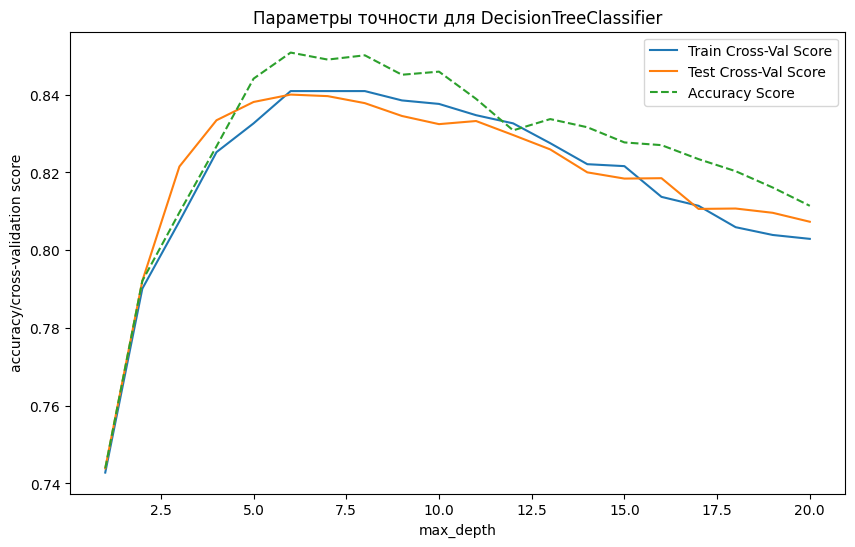

In [34]:
plt.title('Параметры точности для DecisionTreeClassifier')
plt.xlabel('max_depth')
plt.ylabel('accuracy/cross-validation score')
sns.lineplot(x=max_depth_list, y=dec_tree_train_cross_val_score, label='Train Cross-Val Score')
sns.lineplot(x=max_depth_list, y=dec_tree_test_cross_val_score, label='Test Cross-Val Score')
sns.lineplot(x=max_depth_list, y=dec_tree_accuracy_score, label='Accuracy Score', linestyle='--')
# sns.lineplot(x=max_depth_list, y=dec_tree_train_cross_val_score)

<Axes: title={'center': 'Параметры точности для RandomForestClassifier'}, xlabel='max_depth', ylabel='accuracy/cross-validation score'>

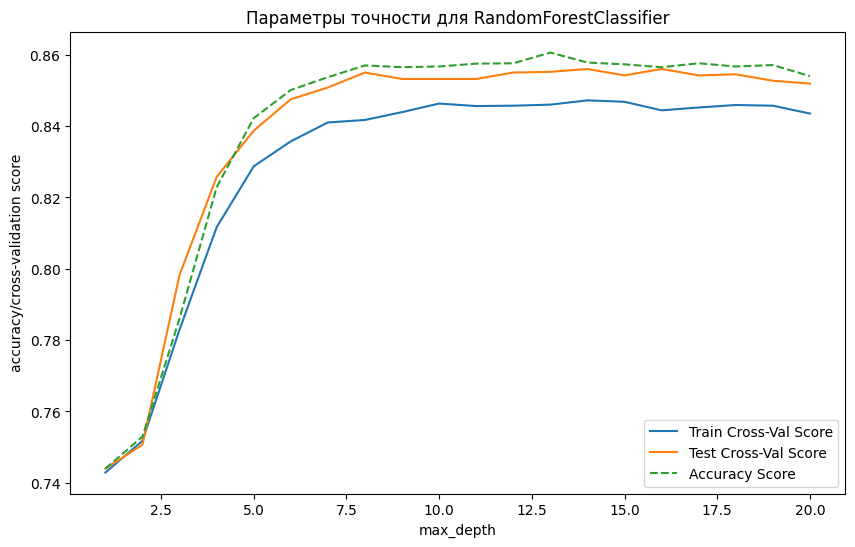

In [33]:
plt.title('Параметры точности для RandomForestClassifier')
plt.xlabel('max_depth')
plt.ylabel('accuracy/cross-validation score')
sns.lineplot(x=max_depth_list, y=random_forest_train_cross_val_score, label='Train Cross-Val Score')
sns.lineplot(x=max_depth_list, y=random_forest_test_cross_val_score, label='Test Cross-Val Score')
sns.lineplot(x=max_depth_list, y=random_forest_accuracy_score, label='Accuracy Score', linestyle='--')

1) RandomForestClassifier показал более хорошие результаты по сравнению с DecisionTreeClassifier

2) DecisionTreeClassifier справился с заданием быстрее (7 секунд) по сравнению с RandomForestClassifier (1 минута 39 секунд), что связано с более сложной структурой RandomForestClassifier, выражающейся в построении множества деревьев решений, в то время как DecisionTreeClassifier строит одно дерево решений

3) Оптимальным значением max_depth для DecisionTreeClassifier является 6, для RandomForestClassifier - 8

3) Представляется также интересным, что с увеличением глубины деревьев точность предсказаний DecisionTreeClassifier падает, а у RandomForestClassifier выходит на плато

Далее произведем подбор других гиперпараметров алгоритмов. Начнет со случайного леса. Для начала подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев. Подберите количество деревьев, начиная с которого качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества деревьев разных размеров, состоящих из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте подобранное количество деревьев.

10) ИМПОРТИРУЕМ МЕТОД GRIDSEARCHCV БИБЛИОТЕКИ SCIKIT-LEARN

In [ ]:
from sklearn.model_selection import GridSearchCV

Теперь подберите следующие оптимальные параметры:
- максимальная глубина решающего дерева (*max_depth*)
- функция оценки качества разбиения (*criterion*)
- максимальное количесво учитываемых признаков при разбиении (*max_features*)

Остальные параметры оставляйте по умолчанию, за исключением парамтра `n_estimators` для случайного леса, выбранного на предыдущем шаге.

Оцените скорость обучения каждого из алгоритмов. Для этого воспользуйтесь графиком вида "ящик с усами", который отражает среднее время обучения алгоритма при фиксированном значении гиперпараметров. Что вы можете сказать о скорости работы алгоритмов? Почему наблюдаются такие результаты? Можно ли ускорить? Если да, то каким образом?

11) ПОДБИРАЕМ ОПТИМАЛЬНЫЕ ПАРАМЕТРЫ ДЛЯ КАЖДОЙ ИЗ МОДЕЛЕЙ С ИСПОЛЬЗОВАНИЕМ МЕТОДА GRIDSEARCHCV

In [ ]:
# your code here

# your code here

rand_forest_param_grid = {
    'n_estimators': range(10, 100, 5),
    'max_features': range(1, len(data.columns)),
    'max_depth': [8],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'random_state': [1]
}

rand_forest_grid_search = GridSearchCV(rand_forest, rand_forest_param_grid)

rand_forest_grid_search.fit(X_train, y_train)

print(f"Лучшие гиперпараметры для RandomForestClassifier: {rand_forest_grid_search.best_params_}")
print(f"Лучшее R2 на кросс-валидации: {rand_forest_grid_search.best_score_:.4f}")

d:\PYTHON_PROJECTS\ml_pro_complex_task\myenv\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Лучшие гиперпараметры для RandomForestClassifier: {'criterion': 'gini', 'max_depth': 8, 'max_features': 54, 'n_estimators': 25, 'random_state': 1}
Лучшее R2 на кросс-валидации: 0.8498


In [ ]:

decision_tree_param_grid = {
    'max_features': range(1, len(data.columns)),
    'max_depth': [6],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'random_state': [1]
}

dec_tree_grid_search = GridSearchCV(dec_tree, decision_tree_param_grid)

dec_tree_grid_search.fit(X_train, y_train)

print(f"Лучшие гиперпараметры для DecisionTreeClassifier: {dec_tree_grid_search.best_params_}")
print(f"Лучшее R2 на кросс-валидации: {dec_tree_grid_search.best_score_:.4f}")

Лучшие гиперпараметры для DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 6, 'max_features': 80, 'random_state': 1}
Лучшее R2 на кросс-валидации: 0.8411


## Сравнение результатов

Сравните результаты алгоритмво. Для этого воспользуйтесь "ящиком с усами" (boxplot).

Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

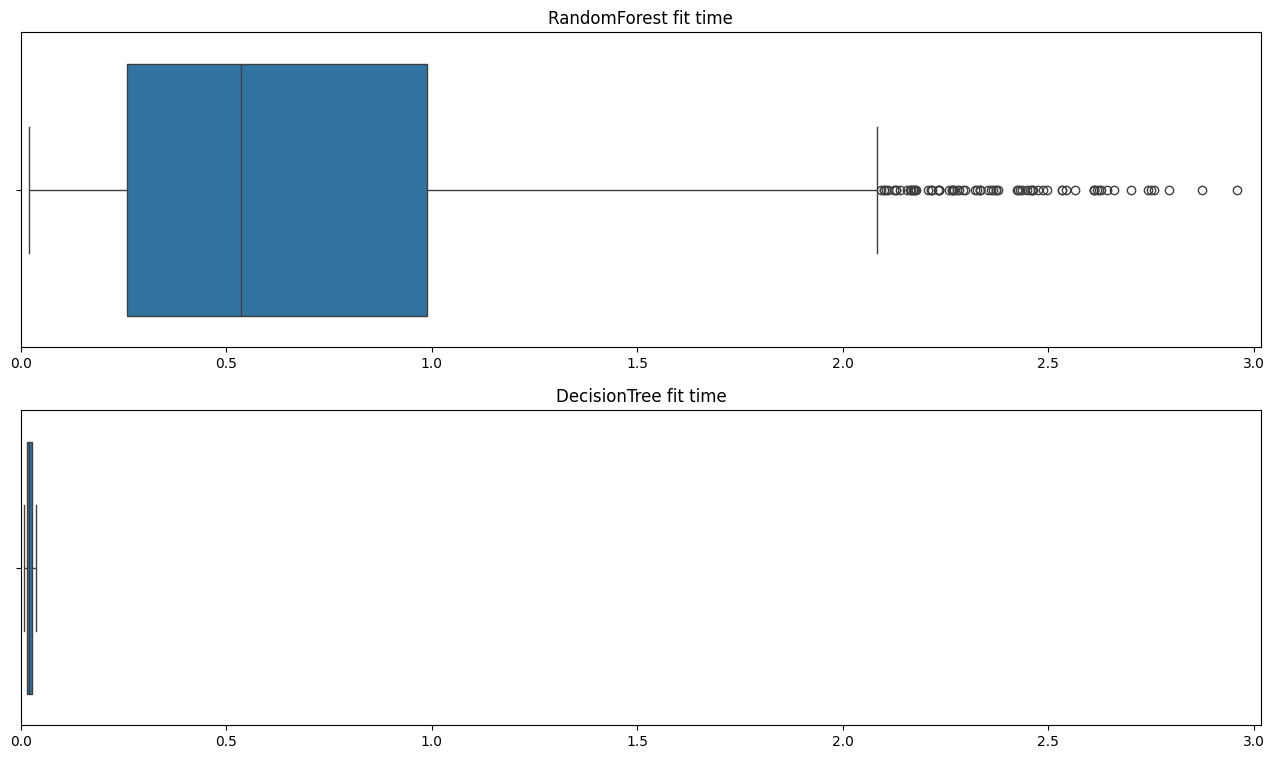

RandomForest fit time mean: 0.6862
DecisionTree fit time mean: 0.0209


In [ ]:
# Рассчитаем и построим графики для визуализации скорости обучения
rf_fit_time = rand_forest_grid_search.cv_results_['mean_fit_time']
dt_fit_time = dec_tree_grid_search.cv_results_['mean_fit_time']
XLIM = max(rf_fit_time.max(), dt_fit_time.max())*1.02

fig, ax = plt.subplots(nrows=2, figsize=(16, 9))

sns.boxplot(x=rf_fit_time, ax=ax[0])
ax[0].set_title('RandomForest fit time')
ax[0].set_xlim(0, XLIM)

sns.boxplot(x=dt_fit_time, ax=ax[1])
ax[1].set_title('DecisionTree fit time')
ax[1].set_xlim(0, XLIM)

plt.show()
print(f'RandomForest fit time mean: {rf_fit_time.mean():.4f}')
print(f'DecisionTree fit time mean: {dt_fit_time.mean():.4f}')

1) Время работы RandomForestClassifier превышает таковое у DecisionTreeClassifier

2) Точность предсказаний выше у RandomForestClassifier

3) Количество гиперпараметров выше у RandomForestClassifier

## Тестирование всех моделей

Протестируйте последние построенные модели (наилучшее решающее дерево и наилучший случайный лес) на данных, которые были отложены для теста (их должно было остаться 40%). Не забудьте про все необходимые преобразования.

12) ТРЕНИРУЮ И ТЕСТИРУЮ РЕШАЮЩЕЕ ДЕРЕВО И СЛУЧАЙНЫЙ ЛЕС С НАИЛУЧШИМИ ПАРАМЕТРАМИ

In [ ]:
rand_forest = RandomForestClassifier(criterion='gini', max_depth=8,max_features=23, random_state=1, n_estimators=70)
dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=6, max_features=58, random_state=1)

rand_forest.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features=58, random_state=1)

In [ ]:
# your code here
rf_pred = rand_forest.predict(X_test)
dt_pred = dec_tree.predict(X_test)

13) ДЛЯ НАГЛЯДНОСТИ СОЗДАЛ ДАТАФРЕЙМ, В КОТОРОМ НАХОДЯТСЯ ТАРГЕТ, ПРЕДСКАЗАННОЕ ЗНАЧЕНИЕ СЛУЧАЙНОГО ЛЕСА И ПРЕДСКАЗАННОЕ ЗНАЧЕНИЕ РЕШАЮЩЕГО ДЕРЕВА

In [ ]:
comparative_df = pd.DataFrame({'Таргет': y_test, 'RandomForest': rf_pred, 'DecisionTree': dt_pred})

In [ ]:
comparative_df

,Таргет,RandomForest,DecisionTree
5816,1,1,1
5313,1,0,0
4355,0,0,0
3374,0,0,0
15084,0,0,0
...,...,...,...
8097,0,0,0
824,1,1,1
12083,1,1,1
11381,1,1,1


14) СОХРАНИЛ ОБУЧЕННЫЕ МОДЕЛИ В ФАЙЛ PICKLE

In [ ]:
import pickle

In [ ]:
with open('rand_forest_model.pkl', 'wb') as file:
    pickle.dump(rand_forest, file)
    
with open('dec_tree_model.pkl', 'wb') as file:
    pickle.dump(dec_tree, file)

15) ОБЪЕДИНИЛ ШАГИ ПО ОЧИСТКЕ И ПОДГОТОВКЕ ДАННЫХ В ЕДИНЫЙ МЕТОД replace_age_with_age_group, СОХРАНИЛ ЕГО В ФАЙЛ METHODS.PY

16) СОЗДАЛ ОТДЕЛЬНЫЙ НОУТБУК models_from_pickle.ipynb, ГДЕ:

    А) ОЧИЩАЮ И ГОТОВЛЮ ДАННЫЕ С ИСПОЛЬЗОВАНИЕМ МЕТОДА replace_age_with_age_group()

    Б) ЗАГРУЖАЮ ОБУЧЕННЫЕ МОДЕЛИ ПРИ ПОМОЩИ МЕТОДА loads() библиотеки pickle
    
    В) ПРИМЕНЯЮ МЕТОД PREDICT НА ЗАГРУЖЕННЫХ МОДЕЛЯХ И ТЕСТОВЫХ ДАННЫХ 